In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.datasets import load_gunpoint
from pyts.transformation import ShapeletTransform
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid", font_scale=1.2, palette="muted")
plt.rcParams["figure.figsize"] = [12, 4]

In [ ]:
def plot_shapelets(X_train, indices):
	plt.figure(figsize=(6, 4))
	for i, index in enumerate(indices):
		idx, start, end = index
		plt.plot(X_train[idx], color=f'C{i}', label=f'Sample {idx}')
		plt.plot(np.arange(start, end), X_train[idx, start:end], lw=5, color=f'C{i}')
	plt.show()

### Gunpoint Dataset

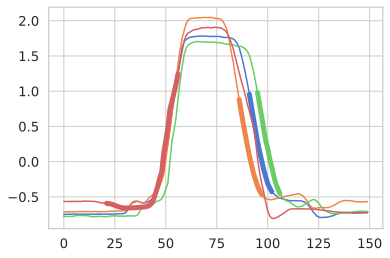

In [9]:
X_train, _, y_train, _ = load_gunpoint(return_X_y=True)
st = ShapeletTransform(window_sizes=[12, 24, 36, 48], random_state=42, sort=True)
st.fit_transform(X_train, y_train)
plot_shapelets(X_train, st.indices_[:4])

### Arrowheads Dataset

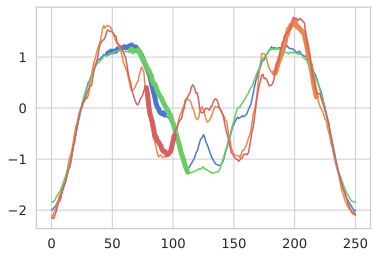

In [10]:
from sktime.datasets import load_arrow_head

X_train, y_train = load_arrow_head(split="train", return_type="numpy2d")
st = ShapeletTransform(window_sizes=[12, 24, 36, 48], random_state=42, sort=True)
st.fit_transform(X_train, y_train)
plot_shapelets(X_train, st.indices_[:4])

### Waterworks Dataset

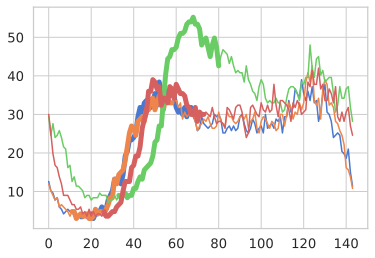

In [18]:
import dask
import dask.dataframe

waterworks = dask.dataframe.read_csv("../data/water_consumption_profiles.csv", parse_dates=['date']).compute()
X_train = waterworks.values[:, 1:]
y_train = waterworks["date"].dt.weekday.values < 5
st = ShapeletTransform(window_sizes=[12, 24, 36, 48], random_state=42, sort=True)
st.fit_transform(X_train, y_train)
plot_shapelets(X_train, st.indices_[:4])